In [1]:
import pickle
import cv2
import numpy as np
from skimage.filters.rank import entropy, mean
import skimage.filters.rank as rank
from skimage.morphology import square
import math
import scipy.misc
import matplotlib.pyplot as plt
from keras.models import load_model
%matplotlib inline
import numpy as np
import pickle
import scipy
from skimage import color
from skimage.filters.rank import entropy
from skimage.filters import gaussian
from skimage.morphology import disk
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
import math

%load_ext autoreload
%autoreload 2

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
images = pickle.load(open('../Code/images-lausanne-zoom-16.p', 'rb'))['sat']

In [3]:
def rgb2ii(img, alpha = 0.5):
    """Convert RGB image to illumination invariant image."""
    ii_image = (0.5 + np.log(img[:, :, 1] / float(255)) -
                alpha * np.log(img[:, :, 2] / float(255)) -
                (1 - alpha) * np.log(img[:, :, 0] / float(255)))

    return ii_image

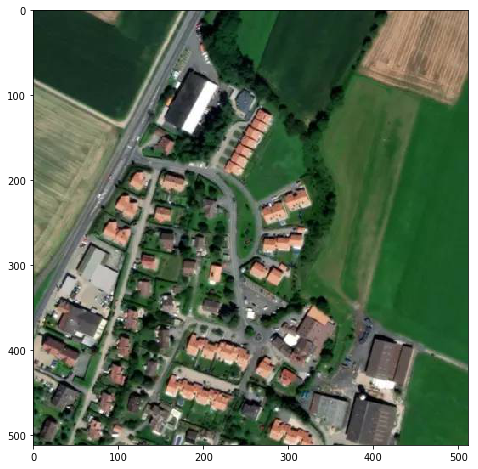

In [74]:
img = images[6]
plt.figure(figsize=(8,8))
plt.imshow(img)

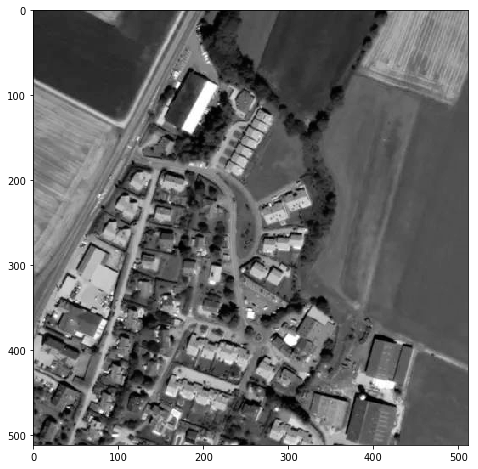

In [75]:
lab_img = color.rgb2lab(img)
plt.figure(figsize=(8,8))
plt.imshow(lab_img[:,:,0],cmap='gray')

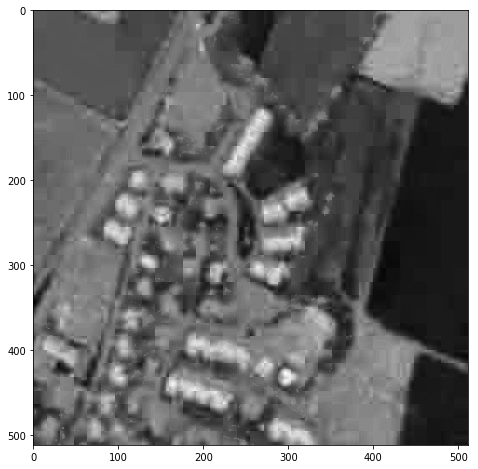

In [76]:
lab_img = color.rgb2lab(img)
plt.figure(figsize=(8,8))
plt.imshow(lab_img[:,:,1],cmap='gray')

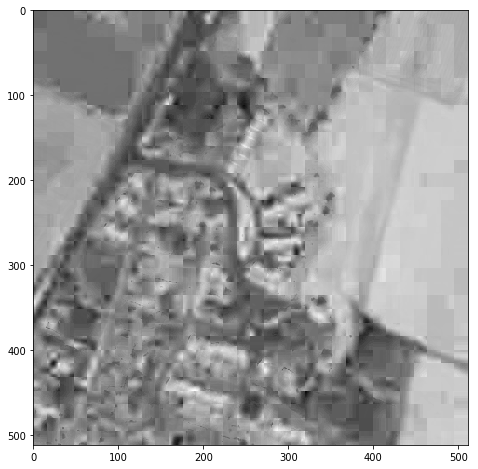

In [77]:
lab_img = color.rgb2lab(img)
plt.figure(figsize=(8,8))
plt.imshow(lab_img[:,:,2],cmap='gray')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in subtract
  """


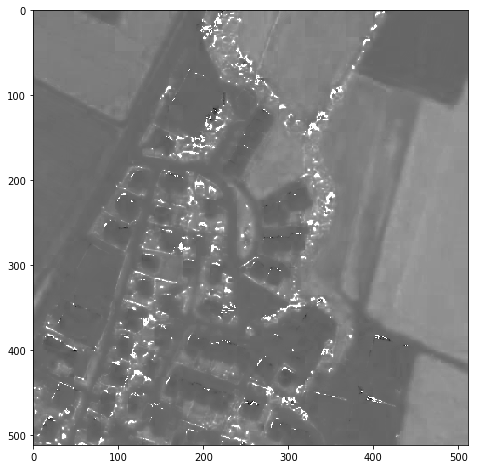

In [78]:
ii_img = rgb2ii(img)

plt.figure(figsize=(8,8))
plt.imshow(ii_img,cmap='gray')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


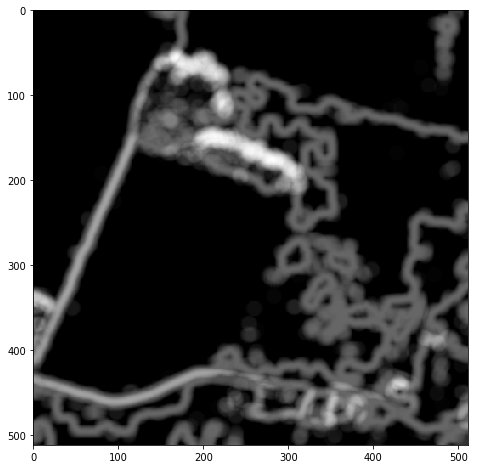

In [63]:
entropy_img = entropy(ii_img / 100, disk(9))

plt.figure(figsize=(8,8))
plt.imshow(entropy_img, cmap='gray')

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


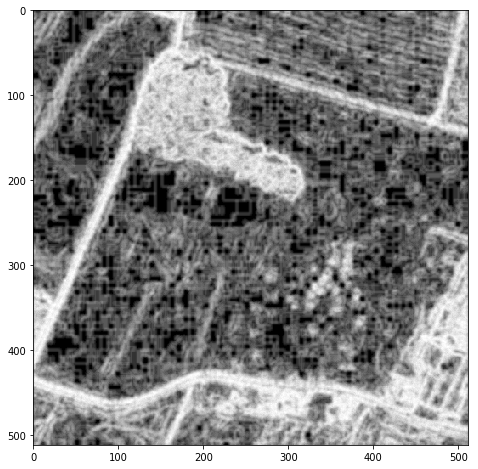

In [64]:
entropy_img = entropy(lab_img[:,:,0] / 100, disk(3))

plt.figure(figsize=(8,8))
plt.imshow(entropy_img, cmap='gray')

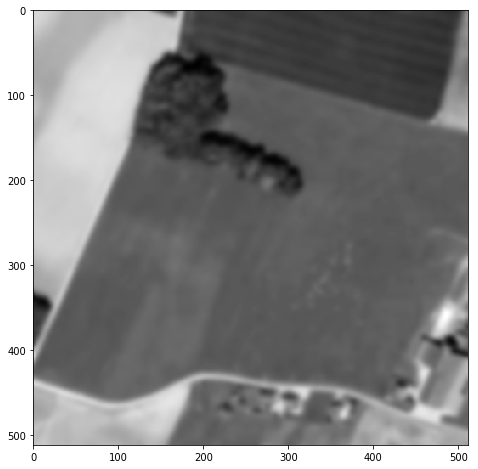

In [65]:
gaussian_img = gaussian(lab_img[:,:,0], 3)
plt.figure(figsize=(8,8))
plt.imshow(gaussian_img, cmap='gray')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


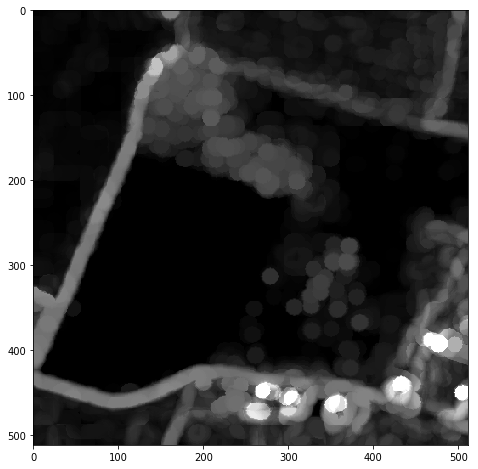

In [67]:
grad_img = rank.gradient(ii_img, disk(9))
plt.figure(figsize=(8,8))
plt.imshow(grad_img, cmap='gray')

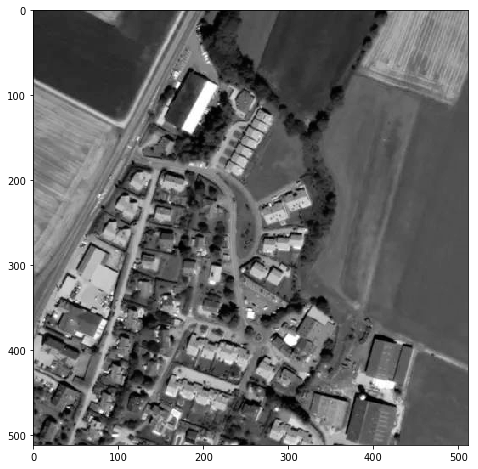

In [82]:
plt.figure(figsize=(8,8))
plt.imshow(lab_img[:,:,0], cmap='gray')

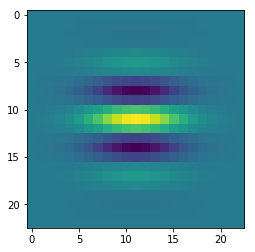

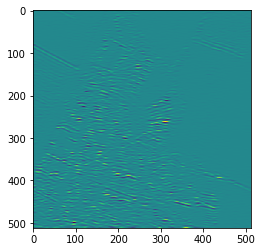

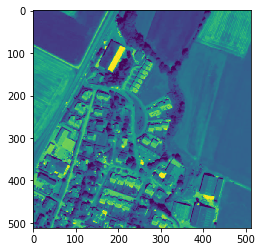

In [128]:
from skimage.filters import gabor_kernel
from scipy import ndimage as ndi
# kernel = np.real(gabor_kernel(0, theta=np.pi/2, sigma_x=math.sqrt(2), sigma_y=math.sqrt(2)))
kernel = np.real(gabor_kernel(1/(2*np.pi), theta=np.pi/2))
plt.imshow(kernel)
plt.figure()
filtered = ndi.convolve(lab_img[:,:,0], kernel, mode='wrap')
plt.imshow(gabor(lab_img[:,:,0], frequency=1/(2*np.pi), theta=np.pi/2)[1])
plt.figure()
plt.imshow(lab_img[:,:,0])

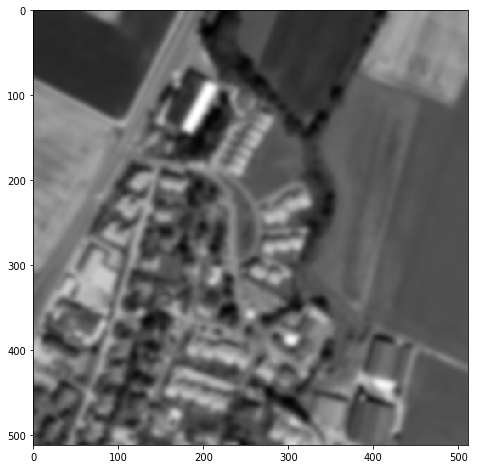

In [86]:
filt_real, filt_imag = gabor(lab_img[:,:,0], frequency=0, theta=np.pi/3, sigma_x=3, sigma_y=3)
plt.figure(figsize=(8,8))
plt.imshow(filt_real, cmap='gray')

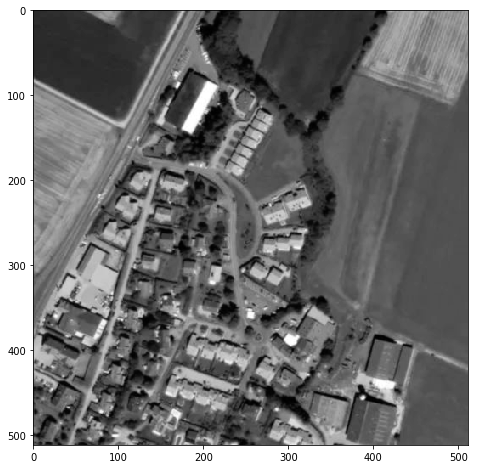

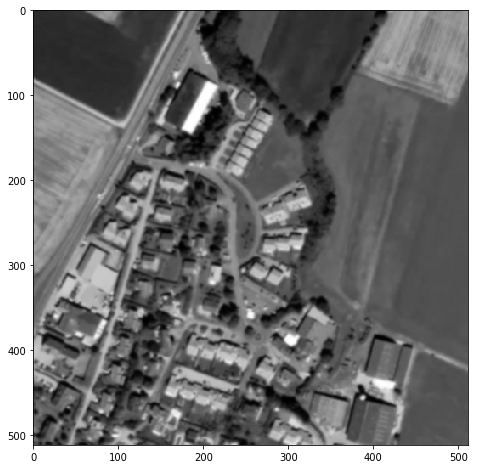

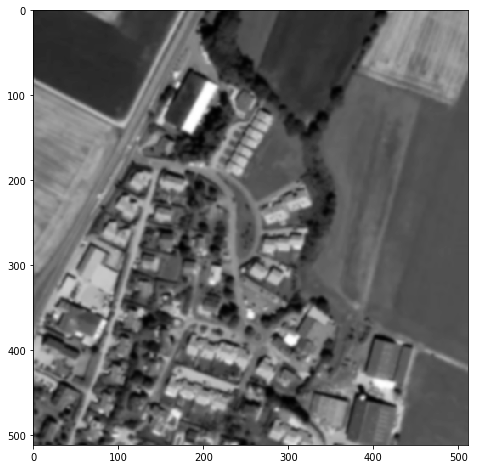

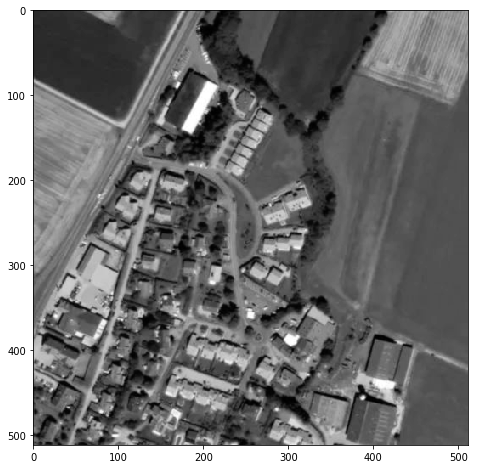

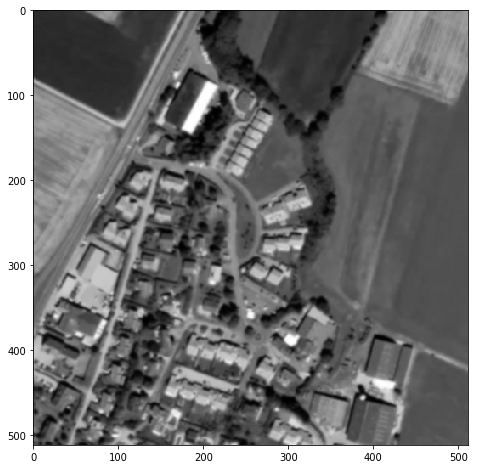

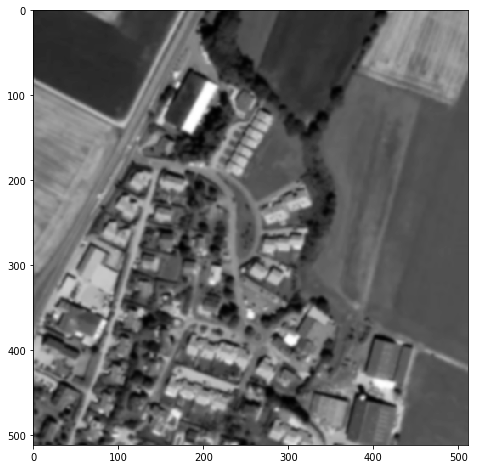

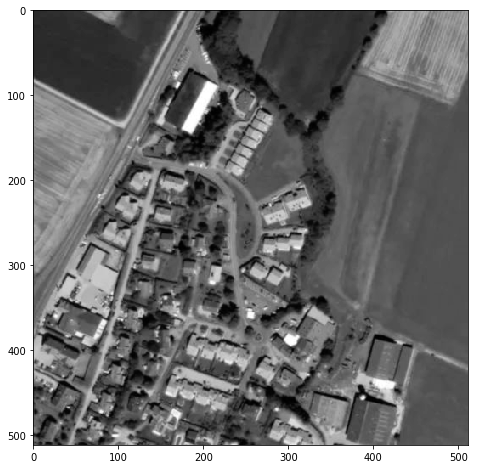

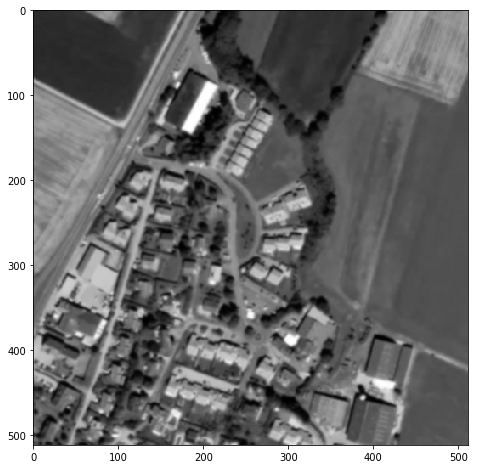

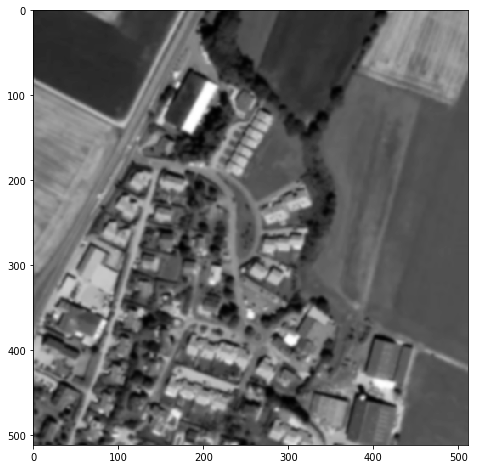

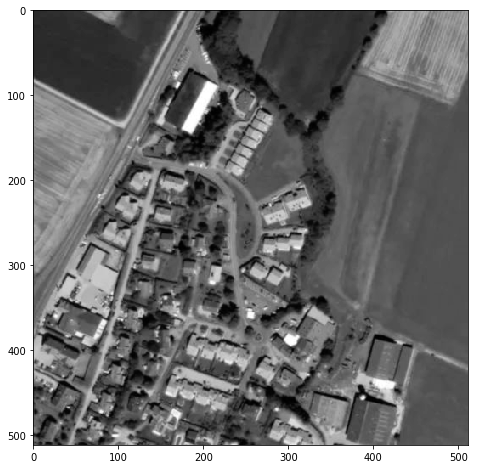

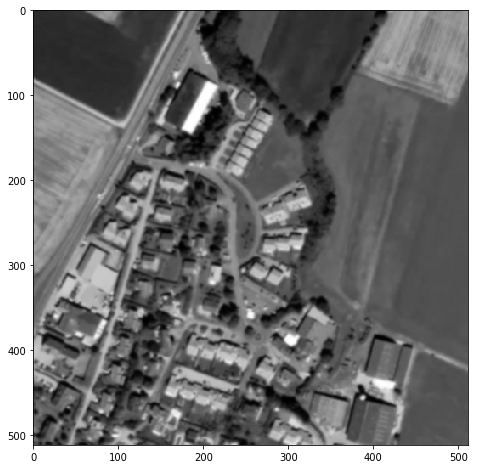

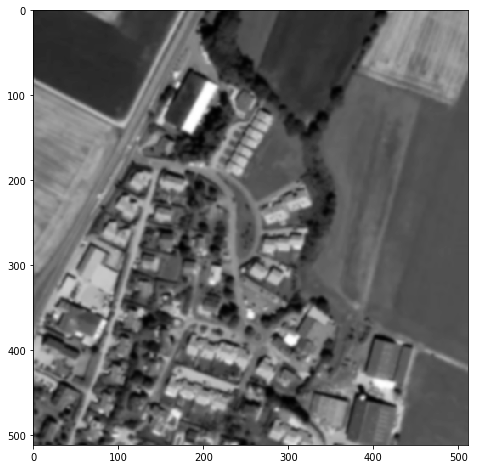

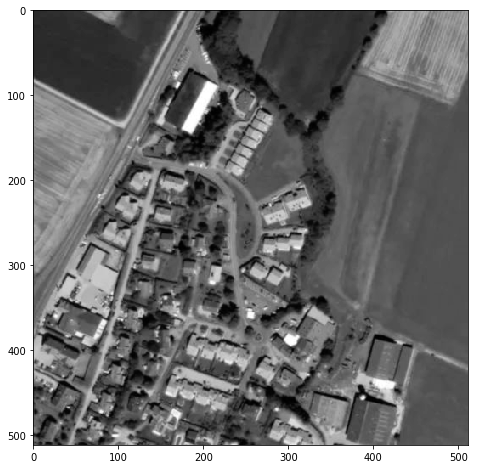

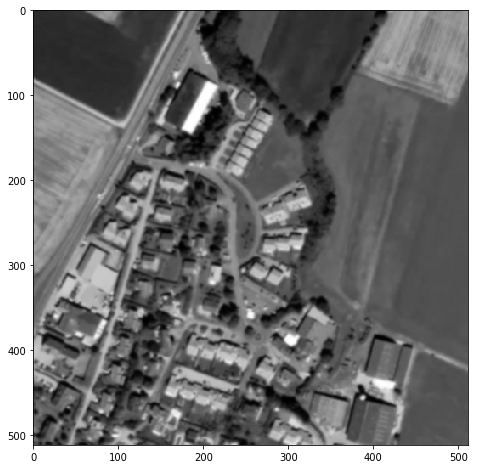

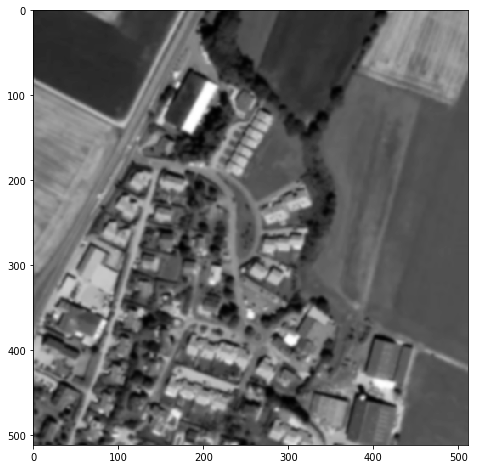

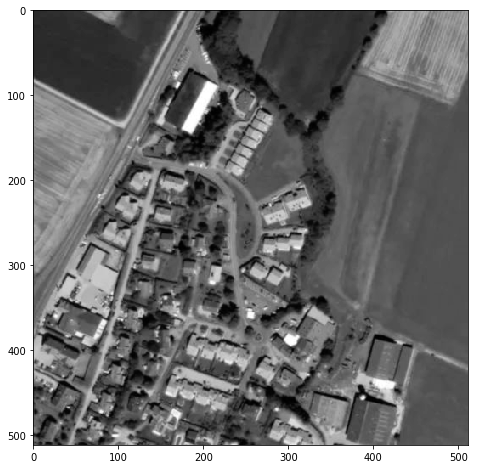

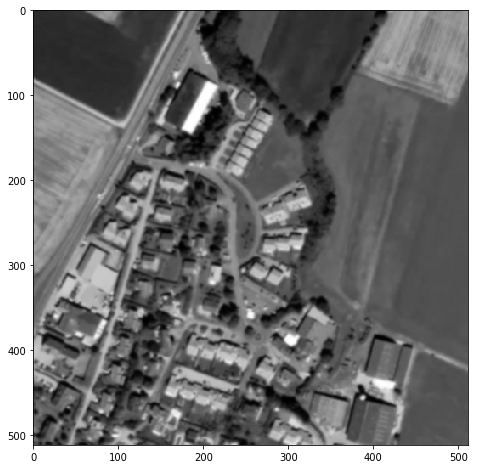

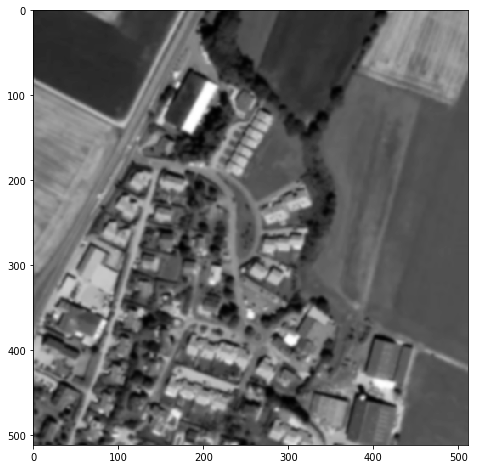

In [80]:
from skimage.filters import gabor
for theta in range(6):
    theta = theta / 6 * np.pi
    for sigma in [.5, 1, math.sqrt(2)]:
        filt_real, filt_imag = gabor(lab_img[:,:,0], frequency=0, theta=theta, sigma_x=sigma, sigma_y=sigma)
        plt.figure(figsize=(8,8))
        plt.imshow(filt_real, cmap='gray')